In [369]:
from selenium import webdriver
import re
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import figure


## Scrape Data from Website

In [246]:
# path to chrome driver
driver_path = "/Users/alexwalsh/Desktop/DU_Masters/chromedriver"
options = webdriver.ChromeOptions()
PROXY = "11.456.448.110:8080"
options.add_argument('--proxy-server=%s' % PROXY)
driver = webdriver.Chrome(executable_path=driver_path, options = options)

In [4]:
months = ["%.2d" % i for i in range(1,13,1)]
years = [str(i) for i in range(2000,2022,1)]
date_urls = []
for y in years:
    for m in months:
        date_urls.append("https://www.nuforc.org/webreports/ndxe{}.html".format(y+m))

df = pd.DataFrame(columns=['date/time', 'city', 'state', 'shape', 'duration', 'summary'])

for url in date_urls:
    print("Getting sighting for year/ month: " + re.findall('[0-9]+', url)[0])
    driver.get(url)
    table = driver.find_element_by_tag_name("tbody")
    rows = table.find_elements_by_tag_name("tr")
    results = []
    for sighting in rows:
        item = sighting.find_elements_by_tag_name("td")
        feats = {
            "date/time" : item[0].text,
            "city" : item[1].text,
            "state" : item[2].text,
            "shape" : item[3].text,
            "duration" : item[4].text,
            "summary" : item[5].text }
        results.append(feats)
        
    results_df = pd.DataFrame(results)
    
    df = pd.concat([df, results_df])

Getting sighting for year/ month: 200001
Getting sighting for year/ month: 200002
Getting sighting for year/ month: 200003
Getting sighting for year/ month: 200004
Getting sighting for year/ month: 200005
Getting sighting for year/ month: 200006
Getting sighting for year/ month: 200007
Getting sighting for year/ month: 200008
Getting sighting for year/ month: 200009
Getting sighting for year/ month: 200010
Getting sighting for year/ month: 200011
Getting sighting for year/ month: 200012
Getting sighting for year/ month: 200101
Getting sighting for year/ month: 200102
Getting sighting for year/ month: 200103
Getting sighting for year/ month: 200104
Getting sighting for year/ month: 200105
Getting sighting for year/ month: 200106
Getting sighting for year/ month: 200107
Getting sighting for year/ month: 200108
Getting sighting for year/ month: 200109
Getting sighting for year/ month: 200110
Getting sighting for year/ month: 200111
Getting sighting for year/ month: 200112
Getting sighting

In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df.to_csv("ufo_dataframe")

In [241]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time cleaned_duration hours minutes seconds  total_time  \
0       1/31/00  22:21            0:8:0     0       8       0         8.0   
1       1/31/00  21:00            0:1:0     0       1       0         1.0   
2       1/30/00  23:15           0:15:0     0      15       0        15.0   
3       1/30/00  10:30            0:2:0     0       2       0         2.0   
4       1/29/00  13:00           0:15:0     0      15       0        15.0   
...         ...    ...              ...   ...     ...     ...         ...   
116516  12/1/21  08:00            0:0:0     0       0       0         0.0   
116517  12/1/21  08:00            0:0:0     0       0       0         0.0   
116518  12/1/21  06:00           0:0:30     0       0      30         0.5   
116519  12/1/21  05:30            0:0:0     0       0       0         0.0   
116520  12/1/21  03:30            0:0:0     0       0       0         0.0   

       year month day  
0        00     1  31  
1        00     1  31  
2        00     1  30  
3        00     1  30  
4        00     1  29  
...     ...   ...  ..  
116516   21    12   1  
116517   21    12   1  
116518   21    12   1  
116519   21    12   1  
116520   21    12   1  

[116521 rows x 16 columns]

## Cleaning / Feature Engineering

In [2]:
# Loading data from csv
df = pd.read_csv("ufo_dataframe.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
original = df.copy(deep = True)

In [259]:
ind = original.sample(10).index
original.loc[ind]

date/time                         city state      shape  \
105646  12/25/19 17:45                         Troy    ID  Formation   
42566   10/22/09 21:30  Morden, Surrey (UK/England)   NaN   Triangle   
49249    4/26/11 16:00          Santarem (Portugal)   NaN      Light   
112337  10/22/20 18:21                      Lincoln    IL  Rectangle   
19535    12/8/04 18:00               Greenwood Lake    NY      Other   
102871    7/3/19 02:30       Foz do Iguaçu (Brazil)   NaN     Circle   
29963     5/8/07 23:45             North Huntingdon    PA     Circle   
43798    2/18/10 19:30        Mojave (21 mi. NW of)    CA     Sphere   
80425     4/5/15 20:45                   Waynesburg    PA      Other   
89161    8/12/16 23:30           Derby (UK/England)   NaN    Unknown   

               duration                                            summary  \
105646        5 minutes  Column of 40+ lights similar to a satellite al...   
42566        20 minutes            Cluster of orange lights over Morden UK   
49249         2 minutes  goodday! =) my boyfriend and i were giving a w...   
112337        3 minutes  It was rectangular and shot out very thin ligh...   
19535            15 sec  3 lights moving very fast from east to west. F...   
102871        6 seconds     Continuously bright light curve up into clouds   
29963   at least 1 hour  A circular stat, obj. was spotted to the north...   
43798             00:30  My companion and I had taken a well marked tra...   
80425         2 minutes  YELLOW STAR LOOKING OBJECT MOVING ACROSS SKY F...   
89161         3 seconds                   4 lights not recorded on camera.   

            date  
105646  12/25/19  
42566   10/22/09  
49249    4/26/11  
112337  10/22/20  
19535    12/8/04  
102871    7/3/19  
29963     5/8/07  
43798    2/18/10  
80425     4/5/15  
89161    8/12/16

In [269]:
original.loc[ind][["duration"]]

duration
105646        5 minutes
42566        20 minutes
49249         2 minutes
112337        3 minutes
19535            15 sec
102871        6 seconds
29963   at least 1 hour
43798             00:30
80425         2 minutes
89161         3 seconds

In [267]:
df.loc[43798,"cleaned_duration"] = "0:0:30"
df.loc[43798,"total_time"] = .5

In [270]:
df.loc[ind][["duration","cleaned_duration","total_time"]]

duration cleaned_duration  total_time
105646        5 minutes            0:5:0        5.00
42566        20 minutes           0:20:0       20.00
49249         2 minutes            0:2:0        2.00
112337        3 minutes            0:3:0        3.00
19535            15 sec           0:0:15        0.25
102871        6 seconds            0:0:6        0.10
29963   at least 1 hour            1:0:0       60.00
43798             00:30           0:0:30        0.50
80425         2 minutes            0:2:0        2.00
89161         3 seconds            0:0:3        0.05

## Cleaning Start

In [4]:
# split date / time into 2 columns

df['date'] = df['date/time'].apply(lambda x: x.split(" ")[0])
df['time'] = df['date/time'].apply(lambda x: x.split(" ")[1] if (len(x.split(" "))) > 1 else np.nan )
# some have a date, but no time, as far as i can tell all have a date
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    Circle   
1       1/31/00 21:00                   Cape Canaveral    FL     Light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  Triangle   
3       1/30/00 10:30                   New Wilmington    PA    Circle   
4       1/29/00 13:00                        Beaverton    OR  Cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  Changing   
116517  12/1/21 08:00                           Austin    TX  Changing   
116518  12/1/21 06:00                       Wytheville    VA     Light   
116519  12/1/21 05:30                 North Fort Myers    FL      Disk   
116520  12/1/21 03:30                          Spokane    WA     Light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  Glowing green light came up right side of movi...   
2                 :15  Encountered large triangular object while nigh...   
3           2 minutes  An airplane like object was witneesed in the s...   
4               15min  Traveling from Portland to Beaverton Saturday ...   
...               ...                                                ...   
116516            NaN  A star-like object seen flitting around at 8am...   
116517        5 years  ((HOAX)) UFO on a star with men in red armored...   
116518  30-60 seconds  Pulsating light doing 90 turns and zig zags be...   
116519            NaN  First witness spotted three black disks, calle...   
116520            NaN  I work ATC at GEG international airport. I kno...   

           date   time  
0       1/31/00  22:21  
1       1/31/00  21:00  
2       1/30/00  23:15  
3       1/30/00  10:30  
4       1/29/00  13:00  
...         ...    ...  
116516  12/1/21  08:00  
116517  12/1/21  08:00  
116518  12/1/21  06:00  
116519  12/1/21  05:30  
116520  12/1/21  03:30  

[116521 rows x 8 columns]

In [5]:
sum(df['date/time'].isna())
# looks like theres a date/time for all 

0

In [6]:
# replacing blanks with np.nan to make things easier for us
df.replace(to_replace="",value=np.nan,inplace=True)

In [7]:
# change d-typings
df = df.astype({
    "city" : "str",
    "state" : "str",
    "shape" : "str",
    "duration" : "str",
    "summary"  : "str"
})

In [8]:
# convert shape, duration, summary all to lower case
df['shape'] = df['shape'].apply(lambda x : x.lower())
df['duration'] = df['duration'].apply(lambda x : x.lower().replace("\n","").strip()) # remove new lines, white space
df['summary'] = df['summary'].apply(lambda x : x.lower())

# convert State to upper 
df['state'] = df['state'].apply(lambda x : x.upper())

# Capitalize city -- if necessary

In [9]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time  
0       1/31/00  22:21  
1       1/31/00  21:00  
2       1/30/00  23:15  
3       1/30/00  10:30  
4       1/29/00  13:00  
...         ...    ...  
116516  12/1/21  08:00  
116517  12/1/21  08:00  
116518  12/1/21  06:00  
116519  12/1/21  05:30  
116520  12/1/21  03:30  

[116521 rows x 8 columns]

In [10]:
# cleaning duration column
    # put in standardized format -- %H/%M/%S --> 01:12:33 = 1 hour, 12 minutes, 33 seconds, 
    #can use strtime to convert back and forth if we need time object
    #best will prob be a regexp to split into parsing categories
    
    # if there are other char than numeric (i.e. :15 or 15 seconds)
        # then 
            # grab numeric chars in first part of string
                # contains("min") -> minute / contains("sec") -> seconds / contians("hour") -> hours
                # put values into dictionary and then into string format 
            # if contains - : take the mean of two values opposing - , i.e '2-4' --> 3
        # else if in m:s format
            # parse into corresponding dict
        
        

In [12]:
def get_immediate_left_numeric(str_val): # helper function to get numeric char immediatley left of keyword, exclude spaces
#     print(str_val)
    str_val = str_val.strip()
    str_val = re.findall(r'\d+', str_val)[0]
    if re.search(" ",str_val) is not None: # if contains multiple spaces, split
        min_string = str_val.split(" ")
        for i in range(len(min_string)):
            if re.search("[0-9]",min_string[-1][0]) is None:
                min_string = min_string[:-1] # drop leftmost value if not numeric
            else:
                return re.findall(r'\d+', min_string[-1])[0]
    else:
        return re.findall(r'\d+', str_val)[0]

In [103]:
t = "2230"

re.findall(r'\d+',t)[0]

'2230'

In [127]:
def get_interval_data(interval, x): 
    ret = "0"
    if len(re.findall(r'\d+',x)[0]) == 4 and re.search(interval,x) is None: # Some records have military time as duration, i.e 2325 -- drop these 
            return np.nan
    # function to search for interval term and grab / clean numeric values associated with interval
    if interval == "min" and re.search("[a-z]",x) is None: # if it just has numeric charecters, assume minutes
        return re.findall(r'\d+',x)[0] # get just numeric charecter and return
    
    if re.search(interval,x) : # contains interval term / or if it's just numeric chars, we want to assume minutes
#         print("Term: ", x)
        # grab word / number left of interval
#         ret = x.split(interval)[0].strip() 
#         ret = ret.strip()

        ret = x.split(interval)[0].strip().split()[-1]
        
#         print("first: ",ret)
        if re.search("[0-9]",ret) is None: # if doesn't have numeric char
#             print("numeric")
            ret = ret.strip()
#             print(ret)
            if interval == "min": # only run these on minutes
                if (ret == "half") or (re.search("moment",ret) != None):
                    ret = ".5"
                elif re.search("one",ret) != None:
                    ret = "1"
                elif (re.search("two",ret) != None) or (re.search("few",ret)!= None) or (re.search("couple",ret)!=None) or (re.search("several",ret)!=None):
                    ret = "2"
                elif ret == "two":
                    ret = "2"
                elif re.search("three",ret) != None:
                    ret = "3"
                elif re.search("four",ret) != None:
                    ret = "4"
                elif re.search("five",ret) != None:
                    ret = "5"
                elif re.search("six",ret) != None:
                    ret = "6"
                elif re.search("seven",ret) != None:
                    ret = "7"
                elif re.search("eight",ret) != None:
                    ret = "8"
                elif re.search("nine",ret) != None:
                    ret = "6"
                elif  re.search("ten",ret) != None:
                    ret = "10"
                elif  re.search("fifteen",ret) != None:
                    ret = "10"
                elif re.search("twenty",ret) != None:
                    ret = "20"
                elif re.search("thirty",ret) != None:
                    ret = "30"
                elif re.search("forty",ret) != None:
                    ret = "40"
                
                
                
                else:
                    print("Missed condtion:", ret)
                    return ret
#             print("returning: ",ret)
            return ret        
    
        else: # has just numeric chars
#             print("type: ",type(ret))
            ret = get_immediate_left_numeric(ret) # get cleaned numeric char
#             print("left_num: ",ret)
            if ret == "1/2":
                ret = ".5"
#                 print("numeric :",ret)
#                 elif re.search("-",ret):
#                     lw = ret.split("-")[0]
#                     try:
#                         upr = ret.split("-")[1]
#                     except: # if for some reason '-' is not inbetween 2 numeric chars, we'd get an index access error
#                         upr = ret.split("-")[0]
#                     ret = str((int(upr) + int(lw)) / 2)
        return ret
        
    else: # doesn't contain interval term
        return ret

In [128]:
def clean_duration(x):
    try:
        if re.search("[a-zA-z]",x) is None: # if contains just non-numeric char
            mins = get_interval_data("min",x) # assume all plain speech is talking iin minutes, i.e a few
            hours = "0"
            sec = "0"
        else:
            sec = get_interval_data("sec",x)
            mins = get_interval_data("min",x)
            hours = get_interval_data("hour",x)  
            
            
        
#         print(hours,mins,sec)
        
        time = hours+":"+mins+":"+sec

        return time

    except Exception as e:
#         print("Excpetion error:",x)
#         print("\n",e)
        return np.nan

In [129]:
df['cleaned_duration'] = df.duration.apply(lambda x :  clean_duration(x)) # clean values

Missed condtion: +
Missed condtion: plus
Missed condtion: many
Missed condtion: +
Missed condtion: plus
Missed condtion: to
Missed condtion: (
Missed condtion: +
Missed condtion: +
Missed condtion: a
Missed condtion: +
Missed condtion: +
Missed condtion: ,
Missed condtion: more
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: plus
Missed condtion: +
Missed condtion: +
Missed condtion: ,
Missed condtion: a
Missed condtion: a
Missed condtion: +-
Missed condtion: a
Missed condtion: a
Missed condtion: a
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: +
Missed condtion: plus
Missed condtion: plus
Missed condtion: solid
Missed condtion: plus
Missed condtion: a
Missed condtion: -
Missed condtion: less
Missed condtion: a
Missed condtion: +
Missed condtion: plus
Missed condtion: more
Missed condtion: a
Missed condtion: a
Missed condtion: follow
Missed condtion: +
Missed condtion: +
Missed condtion: +
Missed condtion: a
Missed condti

In [130]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time cleaned_duration hours minutes seconds  total_time  
0       1/31/00  22:21            0:8:0     0       8       0         8.0  
1       1/31/00  21:00            0:1:0     0       1       0         1.0  
2       1/30/00  23:15           0:15:0     0      15       0        15.0  
3       1/30/00  10:30            0:2:0     0       2       0         2.0  
4       1/29/00  13:00           0:15:0     0      15       0        15.0  
...         ...    ...              ...   ...     ...     ...         ...  
116516  12/1/21  08:00              NaN     0       0       0         0.0  
116517  12/1/21  08:00            0:0:0     0       0       0         0.0  
116518  12/1/21  06:00           0:0:30     0       0      30         0.5  
116519  12/1/21  05:30              NaN     0       0       0         0.0  
116520  12/1/21  03:30              NaN     0       0       0         0.0  

[116521 rows x 13 columns]

In [131]:
df.cleaned_duration.fillna('0:0:0',inplace = True) # fill na with 0 for coverting to float ease, excluding 0 vals when graphing

In [132]:
df["hours"] = df['cleaned_duration'].apply(lambda x : x.split(':')[0] if  x != np.nan else np.nan)
df["minutes"] = df['cleaned_duration'].apply(lambda x : x.split(':')[1] if x != np.nan else np.nan)
df["seconds"] = df['cleaned_duration'].apply(lambda x : x.split(':')[2] if x != np.nan else np.nan)

In [133]:
def create_total_time(x): # put all time in minutes for graphing 
    try:
        hours = float(x.hours) * 60
        minutes = float(x.minutes)
        seconds = float(x.seconds) / 60
        time = hours+minutes+seconds
        return time
    except:
        return 0

In [134]:
df['total_time'] = df.apply(create_total_time,axis=1)

In [206]:
df['year'] = df.date.apply(lambda x : x.split('/')[-1])
df['month'] = df.date.apply(lambda x : x.split('/')[0])
df['day'] = df.date.apply(lambda x : x.split('/')[1])

In [159]:
df

date/time                             city state     shape  \
0       1/31/00 22:21                        Escondido    CA    circle   
1       1/31/00 21:00                   Cape Canaveral    FL     light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA  triangle   
3       1/30/00 10:30                   New Wilmington    PA    circle   
4       1/29/00 13:00                        Beaverton    OR  cylinder   
...               ...                              ...   ...       ...   
116516  12/1/21 08:00                     Mont Belvieu    TX  changing   
116517  12/1/21 08:00                           Austin    TX  changing   
116518  12/1/21 06:00                       Wytheville    VA     light   
116519  12/1/21 05:30                 North Fort Myers    FL      disk   
116520  12/1/21 03:30                          Spokane    WA     light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116516            nan  a star-like object seen flitting around at 8am...   
116517        5 years  ((hoax)) ufo on a star with men in red armored...   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   
116519            nan  first witness spotted three black disks, calle...   
116520            nan  i work atc at geg international airport. i kno...   

           date   time cleaned_duration hours minutes seconds  total_time  \
0       1/31/00  22:21            0:8:0     0       8       0         8.0   
1       1/31/00  21:00            0:1:0     0       1       0         1.0   
2       1/30/00  23:15           0:15:0     0      15       0        15.0   
3       1/30/00  10:30            0:2:0     0       2       0         2.0   
4       1/29/00  13:00           0:15:0     0      15       0        15.0   
...         ...    ...              ...   ...     ...     ...         ...   
116516  12/1/21  08:00            0:0:0     0       0       0         0.0   
116517  12/1/21  08:00            0:0:0     0       0       0         0.0   
116518  12/1/21  06:00           0:0:30     0       0      30         0.5   
116519  12/1/21  05:30            0:0:0     0       0       0         0.0   
116520  12/1/21  03:30            0:0:0     0       0       0         0.0   

       year month day  
0        00    31   1  
1        00    31   1  
2        00    30   1  
3        00    30   1  
4        00    29   1  
...     ...   ...  ..  
116516   21     1  12  
116517   21     1  12  
116518   21     1  12  
116519   21     1  12  
116520   21     1  12  

[116521 rows x 16 columns]

In [136]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
tt = df[df.total_time != 0].groupby("date").mean()
tt.reset_index(inplace=True)
tt['year'] = tt['date'].apply(lambda x : x.split('/')[2])

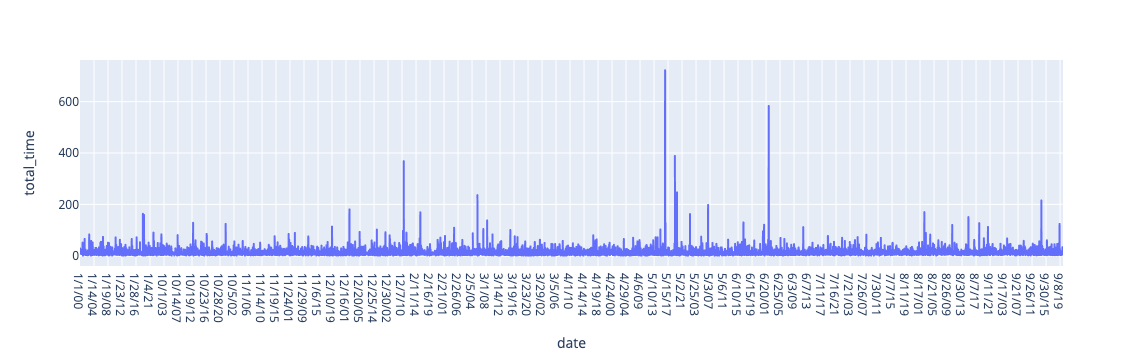

In [141]:
px.line(data_frame = tt, x="date",y="total_time" )


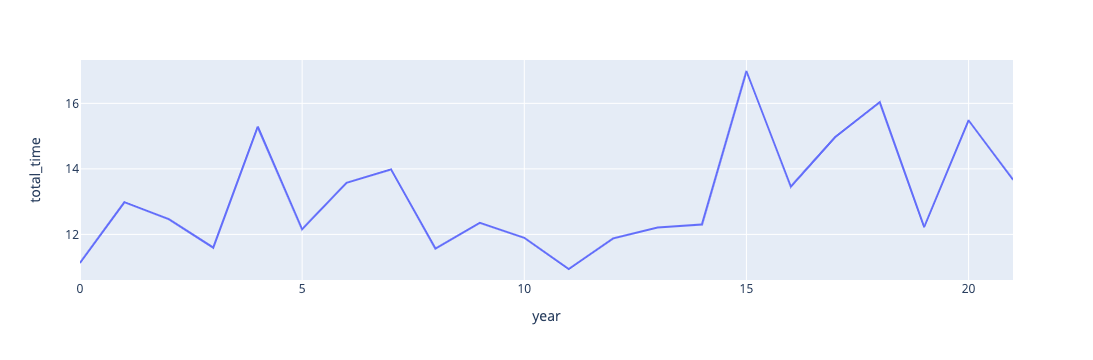

In [142]:
px.line(data_frame = tt.groupby("year",as_index=False).mean(), x="year",y="total_time" )


In [146]:
df[df.total_time != 0]

date/time                             city state      shape  \
0       1/31/00 22:21                        Escondido    CA     circle   
1       1/31/00 21:00                   Cape Canaveral    FL      light   
2       1/30/00 23:15  San Francisco (Farallon Island)    CA   triangle   
3       1/30/00 10:30                   New Wilmington    PA     circle   
4       1/29/00 13:00                        Beaverton    OR   cylinder   
...               ...                              ...   ...        ...   
116447  12/3/21 19:00                      Waynesville    NC      other   
116469  12/3/21 18:30                      Wheat Ridge    CO      light   
116481  12/3/21 17:30                           Irvine    CA  formation   
116504  12/2/21 18:30                        Elk Grove    CA      other   
116518  12/1/21 06:00                       Wytheville    VA      light   

             duration                                            summary  \
0              8 mins  approx 22:21 saw a bright light hovering just ...   
1            1 minute  glowing green light came up right side of movi...   
2                 :15  encountered large triangular object while nigh...   
3           2 minutes  an airplane like object was witneesed in the s...   
4               15min  traveling from portland to beaverton saturday ...   
...               ...                                                ...   
116447      3 minutes  straight line of hundreds of lights. never cha...   
116469     15 seconds  loud jet noise, round red lights flashed north...   
116481      5 minutes  me and siblings were at park when i spotted st...   
116504       1 minute            parallel lights in east nearly overhead   
116518  30-60 seconds  pulsating light doing 90 turns and zig zags be...   

           date   time cleaned_duration hours minutes seconds  total_time  
0       1/31/00  22:21            0:8:0     0       8       0        8.00  
1       1/31/00  21:00            0:1:0     0       1       0        1.00  
2       1/30/00  23:15           0:15:0     0      15       0       15.00  
3       1/30/00  10:30            0:2:0     0       2       0        2.00  
4       1/29/00  13:00           0:15:0     0      15       0       15.00  
...         ...    ...              ...   ...     ...     ...         ...  
116447  12/3/21  19:00            0:3:0     0       3       0        3.00  
116469  12/3/21  18:30           0:0:15     0       0      15        0.25  
116481  12/3/21  17:30            0:5:0     0       5       0        5.00  
116504  12/2/21  18:30            0:1:0     0       1       0        1.00  
116518  12/1/21  06:00           0:0:30     0       0      30        0.50  

[101483 rows x 13 columns]

In [295]:
df["time_hour"] = df.time.apply(lambda x : str(x).split(':')[0])

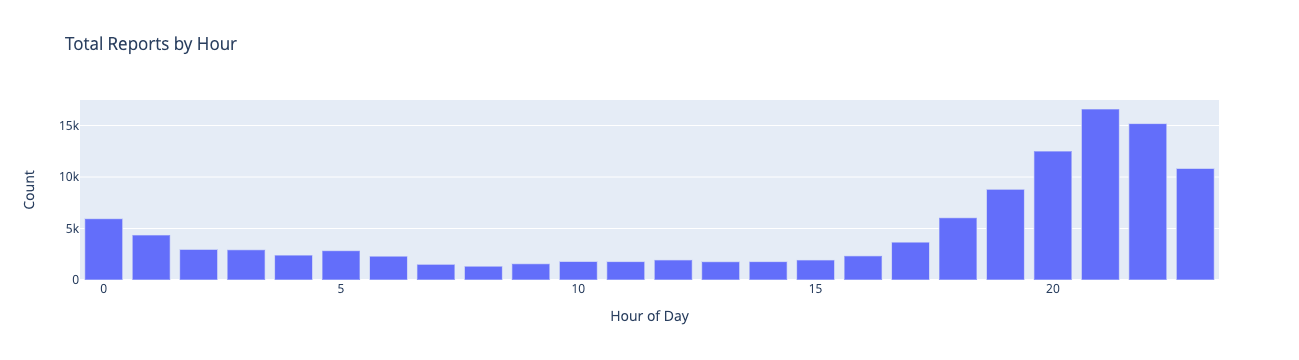

In [302]:
px.bar(df.groupby(by="time_hour",as_index=False).count()[['time_hour','hours']], x = "time_hour",y="hours", title="Total Reports by Hour",
      labels={ "hours" : "Count", "time_hour": "Hour of Day"
      })

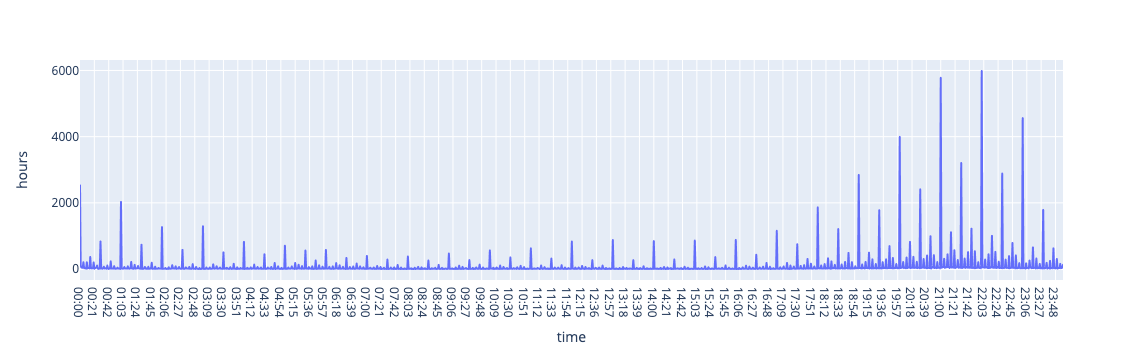

In [283]:
px.line(df.groupby(by="time",as_index=False).count()[['time','hours']], x = "time", y='hours')

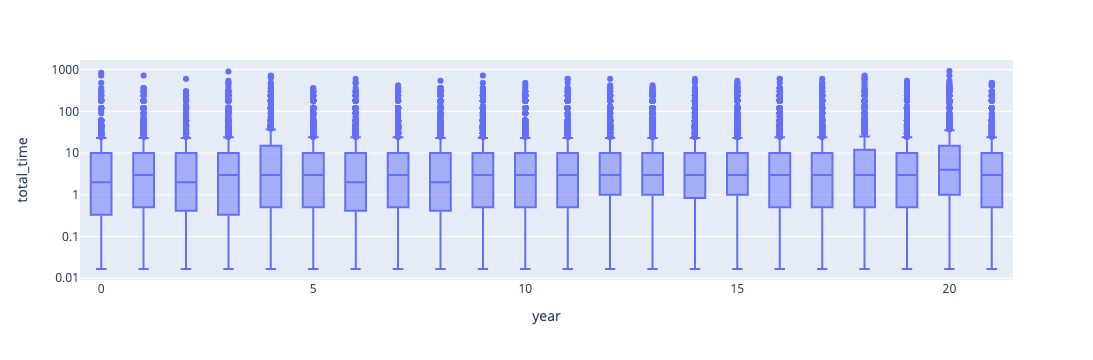

In [157]:
px.box(data_frame=df[(df.total_time != 0) & (df.total_time < 1000)], y = "total_time",x='year',log_y=True)
# applying log scale to make it readable, but generally no outliers when comparing years


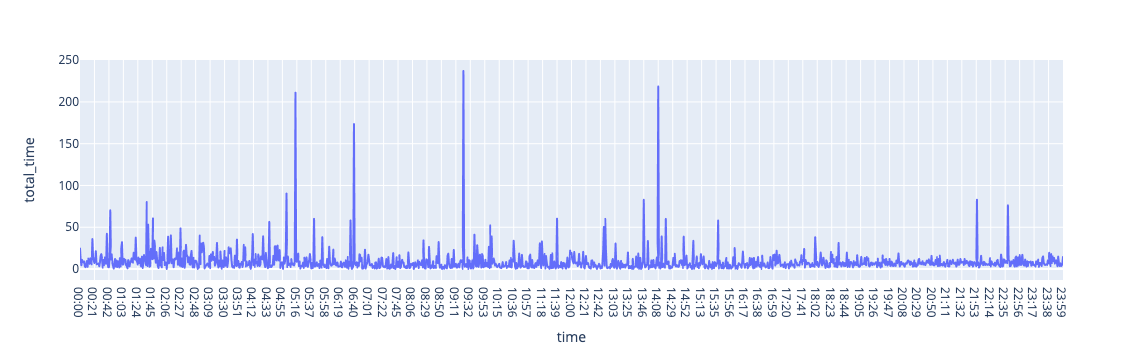

In [163]:
tod = df[df.total_time != 0].groupby("time").mean()
tod.reset_index(inplace=True)
px.line(data_frame = tod, x="time",y="total_time" )


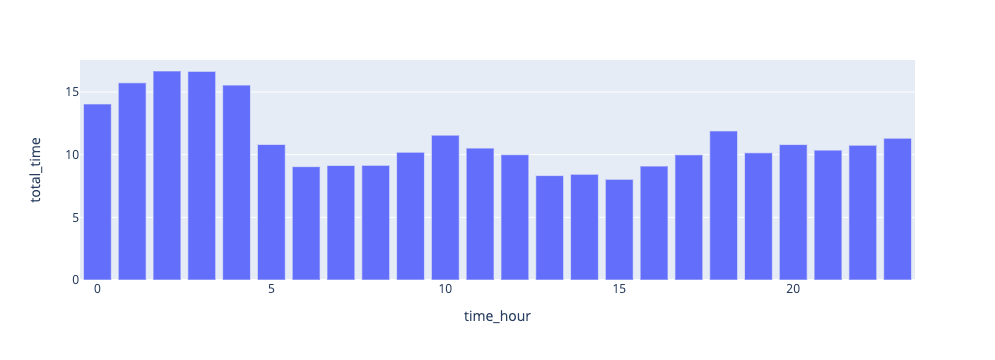

In [331]:
px.bar(df.groupby(by="time_hour",as_index=False).mean()[["time_hour","total_time"]], x = "time_hour", y ="total_time")

In [343]:
df['time_hour'] = df.time_hour.apply(lambda x : str(x))

In [356]:
th = pd.get_dummies(df.time_hour)
cdf = pd.merge(th,df[["total_time"]],right_index=True,left_index=True).drop("nan",axis=1).corr()
cdf["total_time"].sort_values(ascending=False)

total_time    1.000000
1.0           0.019122
2.0           0.018972
3.0           0.018741
0.0           0.014009
4.0           0.013538
18.0          0.003236
10.0          0.000824
23.0          0.000416
5.0          -0.001498
11.0         -0.001961
9.0          -0.002680
20.0         -0.003336
12.0         -0.003536
22.0         -0.004189
8.0          -0.004909
17.0         -0.004931
7.0          -0.005267
16.0         -0.006690
6.0          -0.006796
19.0         -0.006822
14.0         -0.007599
21.0         -0.007840
13.0         -0.007853
15.0         -0.009067
Name: total_time, dtype: float64

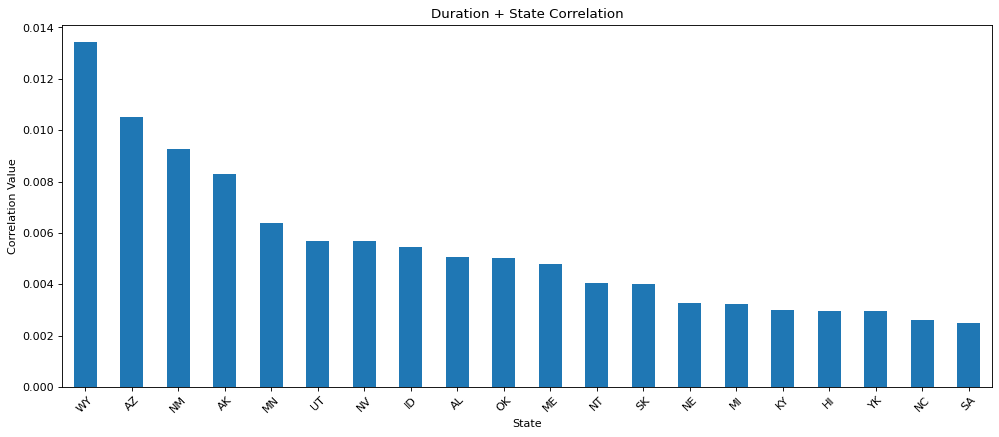

In [374]:
sl = pd.get_dummies(df.state)
sdf = pd.merge(sl,df[["total_time"]],right_index=True,left_index=True).corr()

figure(figsize=(15, 6), dpi=80);

sdf["total_time"].sort_values(ascending=False).drop("total_time").head(20).plot.bar();
plt.xticks(rotation=45);
plt.xlabel("State")
plt.ylabel("Correlation Value")
plt.title("Duration + State Correlation")
plt.show()

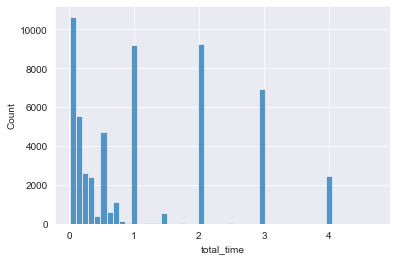

In [490]:
dur = df[(df.total_time > 0) & (df.total_time < 5)]
# sns.set_style("darkgrid")
sns.histplot(data=dur, x='total_time',bins=50 );
# plt.xlabel("Duration of Sighting (mins)")
# plt.title("Distribution of Duration")
# plt.show()


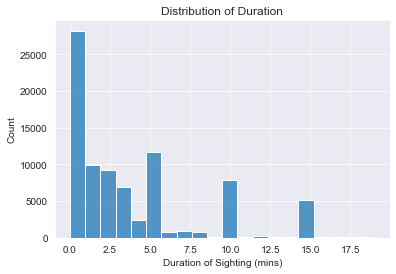

In [484]:
dur = df[(df.total_time > 0) & (df.total_time < 20)]
sns.set_style("darkgrid")
sns.histplot(data=dur, x='total_time',bins=20 );
plt.xlabel("Duration of Sighting (mins)")
plt.title("Distribution of Duration")
plt.show()

In [456]:
dur["total_time"] = dur.total_time.apply(lambda x : round(x))

/Users/alexwalsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [459]:
dur_g = dur.groupby(by="total_time").size()

AttributeError: 'Rectangle' object has no property 'bins'

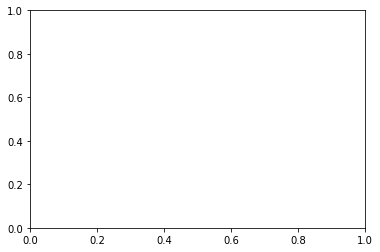

In [464]:
dur_g.plot(kind="bar",bins=20)

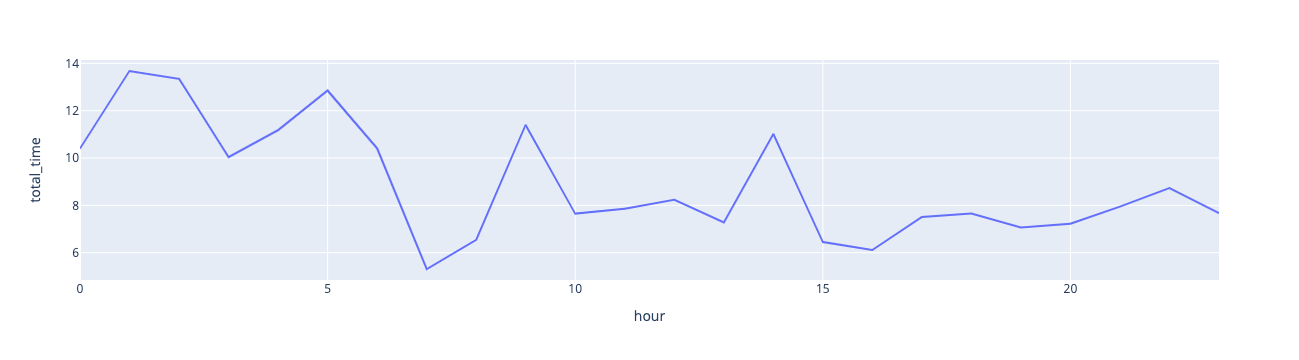

In [272]:
tod['hour'] = tod.time.apply(lambda t:t.split(':')[0])
hod = tod.groupby("hour").mean()
hod.reset_index(inplace=True)
px.line(data_frame=hod,x='hour',y='total_time')

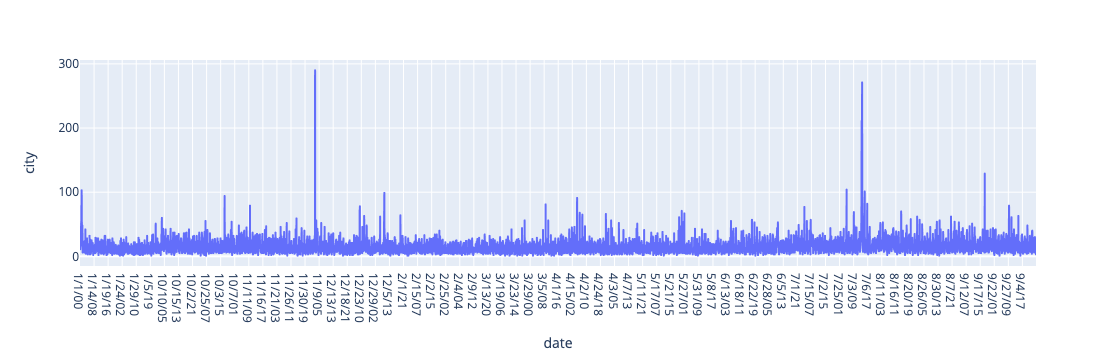

In [240]:
px.line(data_frame=df.groupby(by="date",as_index=False).count()[['date',"city"]], x='date',y='city')
# too noisey, grouping by month

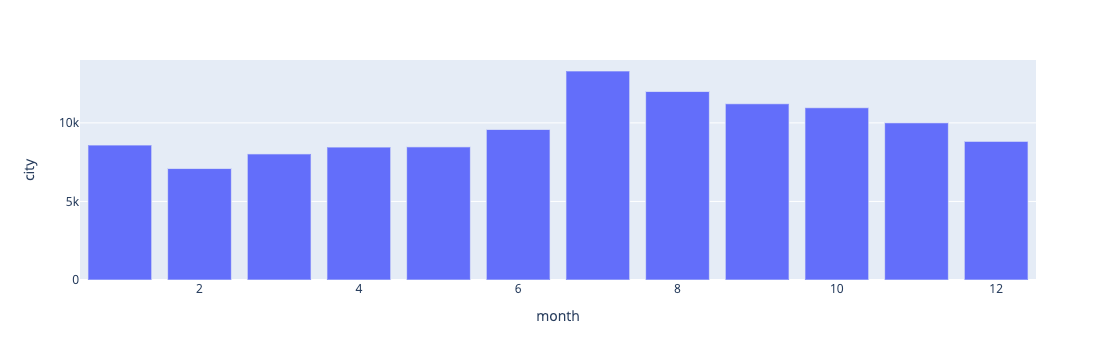

In [385]:
px.bar(data_frame=df.groupby(by="month",as_index=False).count()[['month',"city"]], x='month',y='city')
# too noisey, grouping by month

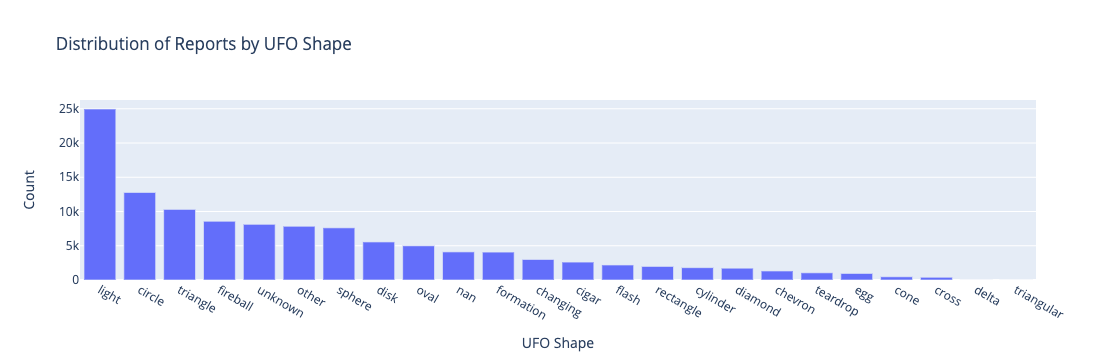

In [439]:
px.bar(data_frame=df.groupby(by="shape",as_index=False).count().sort_values(by="city",ascending=False)[['shape',"city"]],
       x='shape',y='city',labels={ "city" : "Count", "shape": "UFO Shape"}, title="Distribution of Reports by UFO Shape")


In [398]:
df['month'] = df.month.apply(lambda x : int(x))
df['day']=df.day.apply(lambda x : int(x))

In [399]:
df['day_number']  = (((df["month"])-1) *30) + df['day']

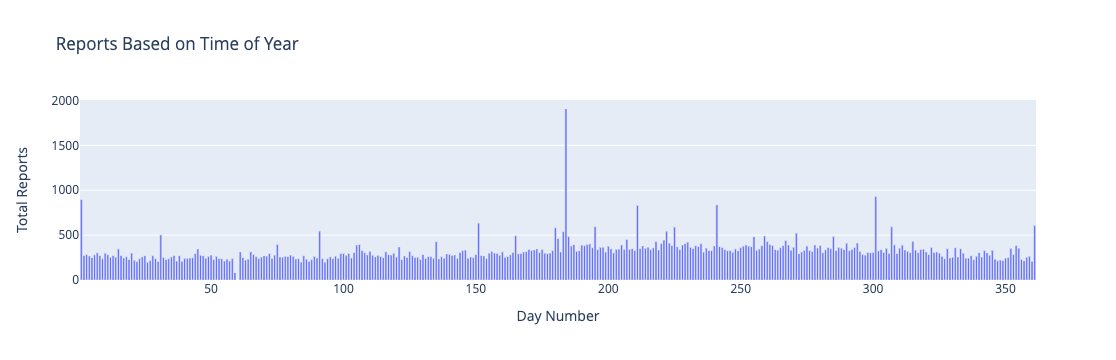

In [414]:
px.bar(data_frame=df.groupby(by="day_number",as_index=False).count()[['day_number',"city"]], x='day_number',y='city', title="Reports Based on Time of Year"
      ,labels={ "city" : "Total Reports", "day_number": "Day Number"
      })
# Day 184 happens to by July 4th ;) 


In [409]:
df[(df.day_number==184)]

date/time         city state     shape        duration  \
1649    7/4/00 23:30       Roslyn    WA     light  1 1/2 to 2 hrs   
1650    7/4/00 23:30       Graham    WA     cigar  still occuring   
1651    7/4/00 23:15  Interlochen    MI     light   2 - 3 minutes   
1652    7/4/00 23:00      Oakland    MD  triangle           4 min   
1653    7/4/00 23:00       Toledo    OH  triangle      20 minutes   
...              ...          ...   ...       ...             ...   
115423  7/4/21 09:49     Brighton    TN  triangle      15 seconds   
115424  7/4/21 04:30      Burbank    CA     other       3 minutes   
115425  7/4/21 03:45       Peoria    AZ  triangle      10 seconds   
115426  7/4/21 01:27   Clearwater    FL     light      30 seconds   
115427  7/4/21 00:04     Richmond    VA  changing      43 seconds   

                                                                                                                                        summary  \
1649                                               bright light sighted for 1 1/2 to 2 hours bouncing eratically in a specific area of the sky.   
1650                                                                             cigar shaped craft to the south with red and blue-green lights   
1651    at about 11:15 pm on july 4th, while watching a fireworks display in a rural area south of interlochen, mi, i noticed a fast moving lig   
1652                                                                                                              triangle with lights no sound   
1653                                                                         a white triangle formation was seen along northern ohio toll road.   
...                                                                                                                                         ...   
115423    the bright orange /yellow lights smoothly and slowly glided across the sky, maintaining a triangular formation. the point of the tria   
115424                                                                                                 large white aircraft seeing over burbank   
115425                                                                                                        4 dim lights in shape of triangle   
115426                                                                               red light traveling from west to east over clearwater, fl.   
115427                                                                  i witnessed several lights along with a bright light flying in the sky.   

          date   time cleaned_duration hours minutes seconds  total_time year  \
1649    7/4/00  23:30            0:0:0     0       0       0    0.000000   00   
1650    7/4/00  23:30            0:0:0     0       0       0    0.000000   00   
1651    7/4/00  23:15            0:3:0     0       3       0    3.000000   00   
1652    7/4/00  23:00            0:4:0     0       4       0    4.000000   00   
1653    7/4/00  23:00           0:20:0     0      20       0   20.000000   00   
...        ...    ...              ...   ...     ...     ...         ...  ...   
115423  7/4/21  09:49           0:0:15     0       0      15    0.250000   21   
115424  7/4/21  04:30            0:3:0     0       3       0    3.000000   21   
115425  7/4/21  03:45           0:0:10     0       0      10    0.166667   21   
115426  7/4/21  01:27           0:0:30     0       0      30    0.500000   21   
115427  7/4/21  00:04           0:0:43     0       0      43    0.716667   21   

        month  day time_hour  day_number  
1649        7    4      23.0         184  
1650        7    4      23.0         184  
1651        7    4      23.0         184  
1652        7    4      23.0         184  
1653        7    4      23.0         184  
...       ...  ...       ...         ...  
115423      7    4       9.0         184  
115424      7    4       4.0         184  
115425      7    4       3.0         184  
115426      7 

In [223]:
md = df.groupby(by=["year","month"], as_index=False).count()[["year","month","city"]]
md["month_year"] = md["month"] + "-" + md["year"]
md["month_year"] = md.month_year.apply(lambda x : datetime.strptime(x,"%m-%y"))

In [227]:
md.sort_values(by=['month_year'],ascending=False,inplace=True)

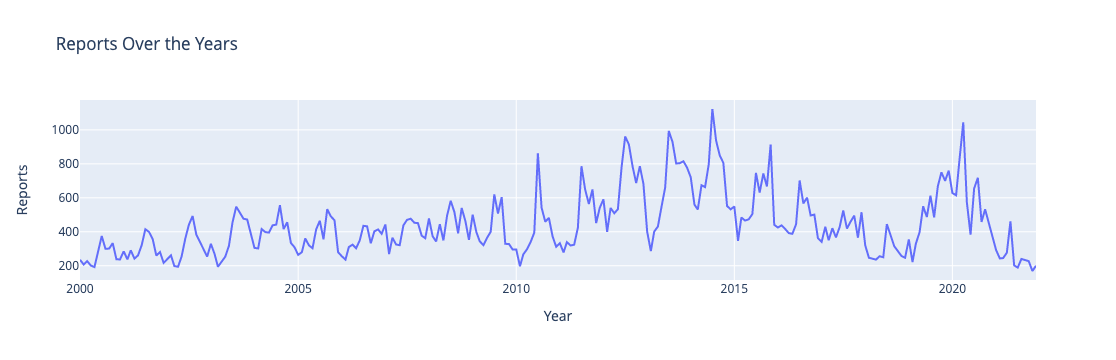

In [416]:
px.line(data_frame= md , x="month_year" , y="city", title="Reports Over the Years",labels={ "city" : "Reports", "month_year": "Year"
      })

In [433]:
ca = df[df.year == "10"]
ca.groupby(by="shape").size().sort_values(ascending=False)

shape
light        1085
circle        475
triangle      456
fireball      391
unknown       349
other         349
sphere        332
disk          246
oval          222
changing      140
formation     113
cigar         103
nan            92
flash          82
rectangle      77
cylinder       73
diamond        68
chevron        56
teardrop       51
egg            27
cross          18
cone           16
dtype: int64

In [527]:
df[df.state=="CA"]["total_time"].mean()

10.469766017874413

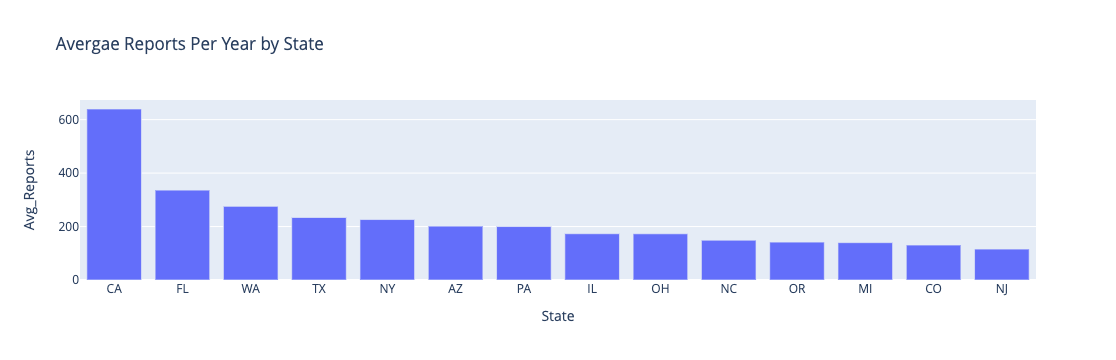

In [518]:
rpy = df.groupby("state",as_index=False).count()[["state","city"]].sort_values(by="city",ascending=False).head(15).rename({
    "state":"State","city":"Reports"
},axis=1) 

rpy["Avg_Reports"] = rpy["Reports"]/20
rpy = rpy[rpy.State!= "NAN"]

px.bar(rpy, x="State", y ="Avg_Reports", title = "Avergae Reports Per Year by State")
# Top 15 highest sighted states

In [239]:
df.groupby(["state","year"],as_index=False).count()[["state","year","city"]].sort_values(by="city",ascending=False).head(15) 
# Top 15 highest sighted states with year, CA been seeing some freaky stuff

state year  city
148    CA   14   869
149    CA   15   814
146    CA   12   760
147    CA   13   728
142    CA   08   708
143    CA   09   646
260    FL   14   644
145    CA   11   625
154    CA   20   623
144    CA   10   605
137    CA   03   598
151    CA   17   592
141    CA   07   588
150    CA   16   579
138    CA   04   565

In [248]:
df.to_csv("ufo_cleaned.csv")

In [324]:
from wordcloud import WordCloud

full_text = " ".join(df.summary.apply(lambda x: x if re.search("nuforc",x) is None else ""))
wordcloud = WordCloud().generate(full_text)


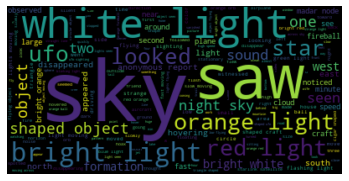

<Figure size 432x288 with 0 Axes>

In [325]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()
plt.savefig(fname="./wordcloud")

### Map Choropleth

In [377]:
from geopy.geocoders import ArcGIS
import pandas as pd
%matplotlib inline
import matplotlib
import seaborn as sns
import folium
from folium.plugins import StripePattern
import geopandas as gpd

In [378]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
gdf = gpd.read_file(state_geo)


In [383]:
fmap = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='sightings',
    data=df.groupby("state",as_index=False).count()[["state","city"]],
    columns=['state', 'city'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of sightings',
    show=True,
    overlay=True,
    nan_fill_color = "White"
).add_to(fmap)


folium.LayerControl().add_to(fmap)

# loc = 'Year of Passage for Married Women Protection of Husband Debt'
# title_html = '''
#              <h3 align="center" style="font-size:16px"><b>{}</b></h3>
#              '''.format(loc) 

# debt.get_root().html.add_child(folium.Element(title_html))


display(fmap)

In [311]:
from collections import defaultdict
from collections import Counter
import webcolors

def frecuency_words(d):
    total_words = []
    results = defaultdict(list)
    messages = d['summary'].unique().tolist()
    for message in messages:
        if type(message) == float:
            pass
        else:
            message = message.split()
            for m in message:

                if len(m)>1:
                  total_words.append(m)
                else:
                    pass
    words = Counter(total_words)
    values = list(words.values())
    words = list(words.keys())
    results['word'] = words
    results['frequency'] = values
    df = pd.DataFrame(results) 
    return df

df_f = frecuency_words(df)

df_f = df_f.sort_values(by = 'frequency', ascending=False)
most_common = df_f.head(n=300)

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
most_common = most_common.loc[~most_common['word'].isin(stopwords) & ~most_common['word'].isin(webcolors.CSS3_NAMES_TO_HEX)]

In [314]:
most_common['word']

63        lights
4          light
3         bright
41        object
61           sky
          ...   
1063    metallic
322         five
2554       beach
2255      second
239      pattern
Name: word, Length: 225, dtype: object